# Timeseries Analysis : Forecasting temperature from annual mean temperature in India



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] =10,6
dataset =pd.read_csv("temperature.csv")

print(dataset.head(10))

   year  temperature
0  1901        24.23
1  1902        24.33
2  1903        23.80
3  1904        23.86
4  1905        23.71
5  1906        24.12
6  1907        23.87
7  1908        23.95
8  1909        23.78
9  1910        23.77


In [2]:
dataset

,year,temperature
0,1901,24.2300
1,1902,24.3300
2,1903,23.8000
3,1904,23.8600
4,1905,23.7100
5,1906,24.1200
6,1907,23.8700
7,1908,23.9500
8,1909,23.7800
9,1910,23.7700


# remove bad values

In [3]:

dataset=dataset.drop(dataset.index[115])

dataset=dataset.drop(dataset.index[115])

In [4]:
dataset.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            105, 106, 107, 108, 109, 110, 111, 112, 113, 114],
           dtype='int64', length=115)

In [5]:
dataset.dtypes

year            object
temperature    float64
dtype: object

In [6]:
dataset['year'] = pd.to_datetime(dataset['year'], infer_datetime_format=True)

In [7]:
#the index has to be the variable depicting date-time information.
dataset.index =dataset['year']


In [8]:
indexedDataset= dataset.set_index(['year'])

In [36]:
indexedDataset.index.freq

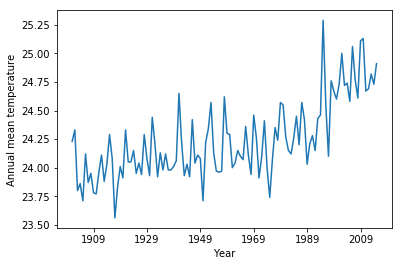

In [9]:
#plot the graph
plt.xlabel("Year")
plt.ylabel("Annual mean temperature")
plt.plot(indexedDataset)

# Check stationarity of data

In [10]:
# visibly, the data is not stationary
#I do two tests for stationarity -Rolling statistics and Augmentmen Dicky Fuller test
# rolling ststistics is done with a window of 10 years
rollmean = indexedDataset.rolling(window=10).mean()
rollstd= indexedDataset.rolling(window=10).std()
print(rollmean,rollstd)

            temperature
year                   
1901-01-01          NaN
1902-01-01          NaN
1903-01-01          NaN
1904-01-01          NaN
1905-01-01          NaN
1906-01-01          NaN
1907-01-01          NaN
1908-01-01          NaN
1909-01-01          NaN
1910-01-01       23.942
1911-01-01       23.915
1912-01-01       23.893
1913-01-01       23.901
1914-01-01       23.918
1915-01-01       23.976
1916-01-01       23.972
1917-01-01       23.941
1918-01-01       23.929
1919-01-01       23.952
1920-01-01       23.966
1921-01-01       24.003
1922-01-01       23.997
1923-01-01       24.014
1924-01-01       24.026
1925-01-01       23.992
1926-01-01       23.988
1927-01-01       24.026
1928-01-01       24.072
1929-01-01       24.079
1930-01-01       24.081
...                 ...
1986-01-01       24.316
1987-01-01       24.338
1988-01-01       24.356
1989-01-01       24.302
1990-01-01       24.268
1991-01-01       24.269
1992-01-01       24.269
1993-01-01       24.300
1994-01-01      

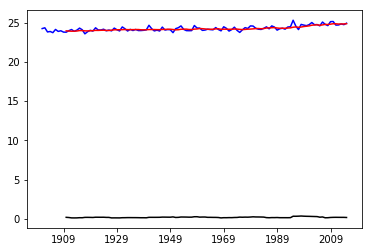

In [11]:
#plot rolling statistics
original = plt.plot(indexedDataset, color='blue', label='Original')
mean = plt.plot(rollmean, color ='Red', label = 'Rolling mean')
std = plt.plot(rollstd, color='black', label='Rolling Std')

In [12]:
#the mean and standard deviation seems constant over time, still nothing is decided until seeing the results of ADFT.
from statsmodels.tsa.stattools import adfuller

print('Results of Dicky-Fuller test')

dftest =adfuller(indexedDataset['temperature'] , autolag= 'AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistics','p-value', '#lags used' ,'Number of observations used'])
for key,value in dftest[4].items():
    dfoutput['Critical value (%s) '%key] =value
    
print(dfoutput)

Results of Dicky-Fuller test
Test Statistics                  0.262724
p-value                          0.975568
#lags used                       6.000000
Number of observations used    108.000000
Critical value (1%)             -3.492401
Critical value (5%)             -2.888697
Critical value (10%)            -2.581255
dtype: float64


In [13]:
#The Dicky-Fuller shows that the data is non-stationary - we cannot reject the null hypothesis
#It is necessary to stationarize the data


# Stationarize the data
1. Estimating & Eliminating Trend

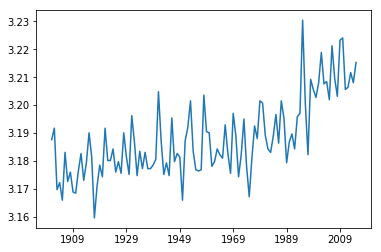

In [14]:
#estimating trend
indexedDatasetLog=np.log(indexedDataset)
plt.plot(indexedDatasetLog)

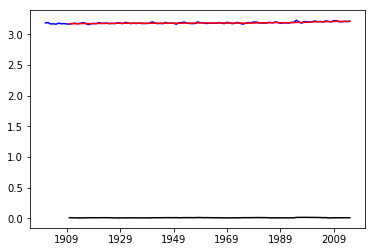

In [15]:
#rolling statistics with log data
rollingMeanLog= indexedDatasetLog.rolling(window=10).mean()
rollingStdLog= indexedDatasetLog.rolling(window=10).std()

#plot rolling statistics
original = plt.plot(indexedDatasetLog, color='blue', label='Original')
mean = plt.plot(rollingMeanLog, color ='Red', label = 'Rolling mean Log')
std = plt.plot(rollingStdLog, color='black', label='Rolling Std Log')

In [16]:
#Dicky-Fuller test with log data.
from statsmodels.tsa.stattools import adfuller

print('Results of Dicky-Fuller test')

dftest =adfuller(indexedDatasetLog['temperature'] , autolag= 'AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistics','p-value', '#lags used' ,'Number of observations used'])
for key,value in dftest[4].items():
    dfoutput['Critical value (%s) '%key] =value
    
print(dfoutput)

Results of Dicky-Fuller test
Test Statistics                  0.243779
p-value                          0.974613
#lags used                       6.000000
Number of observations used    108.000000
Critical value (1%)             -3.492401
Critical value (5%)             -2.888697
Critical value (10%)            -2.581255
dtype: float64


In [17]:
# next try: log - Moving average
dataLogMinusMA = indexedDatasetLog - rollingMeanLog
dataLogMinusMA.head(20)

,temperature
year,
1901-01-01,NaN
1902-01-01,NaN
1903-01-01,NaN
1904-01-01,NaN
1905-01-01,NaN
1906-01-01,NaN
1907-01-01,NaN
1908-01-01,NaN
1909-01-01,NaN


In [18]:
#drop NaN values
dataLogMinusMA.dropna(inplace=True)

In [19]:
#check stationarity of this data
#Dicky-Fuller test with log-MA data.
from statsmodels.tsa.stattools import adfuller

print('Results of Dicky-Fuller test')

dftest =adfuller(dataLogMinusMA['temperature'] , autolag= 'AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistics','p-value', '#lags used' ,'Number of observations used'])
for key,value in dftest[4].items():
    dfoutput['Critical value (%s) '%key] =value
    
print(dfoutput)

Results of Dicky-Fuller test
Test Statistics                -3.382708
p-value                         0.011563
#lags used                      6.000000
Number of observations used    99.000000
Critical value (1%)            -3.498198
Critical value (5%)            -2.891208
Critical value (10%)           -2.582596
dtype: float64


# According to Dicky-Fuller test, the data is stationary with 95% confidence

# Differencing: First order differencing

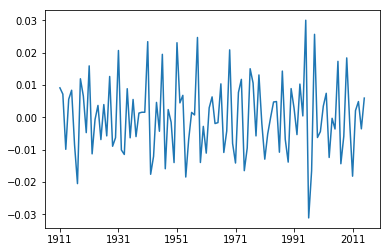

In [20]:
dataLogMinusMAdiff = dataLogMinusMA - dataLogMinusMA.shift(1)
plt.plot(dataLogMinusMAdiff)

In [21]:
dataLogMinusMAdiff.dropna(inplace=True)

In [22]:
dataLogMinusMAdiff

,temperature
year,
1911-01-01,0.009082
1912-01-01,0.007149
1913-01-01,-0.009921
1914-01-01,0.005552
1915-01-01,0.008345
1916-01-01,-0.008517
1917-01-01,-0.020524
1918-01-01,0.011897
1919-01-01,0.006563


In [23]:
#check stationarity of this data
#Dicky-Fuller test with log-MA data.
from statsmodels.tsa.stattools import adfuller

print('Results of Dicky-Fuller test')

dftest =adfuller(dataLogMinusMAdiff['temperature'] , autolag= 'AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistics','p-value', '#lags used' ,'Number of observations used'])
for key,value in dftest[4].items():
    dfoutput['Critical value (%s) '%key] =value
    
print(dfoutput)

Results of Dicky-Fuller test
Test Statistics               -6.053724e+00
p-value                        1.259650e-07
#lags used                     9.000000e+00
Number of observations used    9.500000e+01
Critical value (1%)           -3.501137e+00
Critical value (5%)           -2.892480e+00
Critical value (10%)          -2.583275e+00
dtype: float64


# Decomposition: Seasonality, Trend, Residual

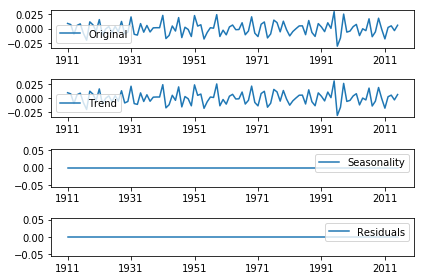

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(dataLogMinusMAdiff)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(dataLogMinusMAdiff, label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)

plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)

plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

# Forecasting a time series

Text(0.5,1,'Autocorrelation Function')

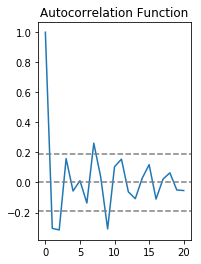

In [37]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(dataLogMinusMAdiff, nlags=20)
lag_pacf = pacf(dataLogMinusMAdiff, nlags=20, method='ols')

#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(dataLogMinusMAdiff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(dataLogMinusMAdiff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

In [26]:
#The ACF graph shows q=1

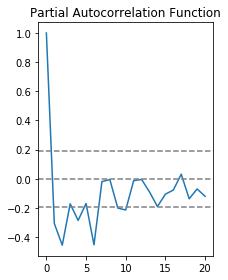

In [38]:
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(dataLogMinusMAdiff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(dataLogMinusMAdiff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [28]:
#PACF graph shows p=1

# I try 3 models: 1.AR, 2.MA, 3.ARIMA and check which works best

# AR model : p=1,d=1,q=0

C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


Text(0.5,1,'RSS: nan')

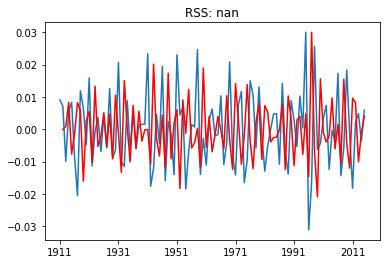

In [39]:

from statsmodels.tsa.arima_model import ARIMA  

model = ARIMA(dataLogMinusMAdiff, order=(1, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(dataLogMinusMAdiff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-dataLogMinusMAdiff["temperature"])**2))

# MA model :p=0, d=1,q=1

C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Text(0.5,1,'RSS: nan')

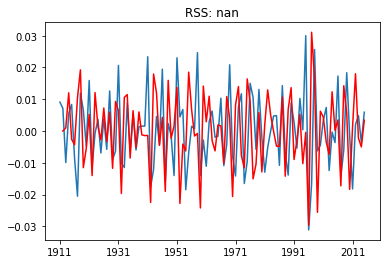

In [40]:
model = ARIMA(dataLogMinusMAdiff, order=(0, 1, 1))  
results_MA = model.fit(disp=-1)  
plt.plot(dataLogMinusMAdiff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-dataLogMinusMAdiff["temperature"])**2))

# combined model

In [44]:
model = ARIMA(dataLogMinusMAdiff, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(dataLogMinusMAdiff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-dataLogMinusMAdiff["temperature"])**2))

C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


ValueError: The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.